In [12]:
# ほぼ、ここと同じ
# http://gratk.hatenablog.jp/entry/2017/12/14/001357

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# データの読み込み
txt_file = '~/myproj/study_ml/IADML/data/qtdbsel102.txt'

df = pd.read_csv(txt_file, sep="\t", header=None)

xi = df.loc[3000:5999, 2].values

# 部分時系列の作成
def embed(x, w):
    t = x.shape[0]
    n = t-w+1
    pts = np.zeros((n,w))
    for i in range(n):
        window = x[i:i+w]
        pts[i,:] = window.T
    
    return pts

In [13]:
w = 50
m = 2
k = int(w / 2)
L = int(k / 2)
Tt = len(xi)
score = np.zeros((Tt,))

In [19]:
for t in range(w+k,Tt-L+1):
    tstart = t - w - k + 1
    tend = t - 1
    X1 = embed(xi[tstart:tend],w).T
    X1 = np.fliplr(X1)
    
    tstart = t - w - k + 1 + L
    tend = t - 1 + L
    X2 = embed(xi[tstart:tend],w).T
    X2 = np.fliplr(X2)
    
    U1, s1, V1 = np.linalg.svd(X1, full_matrices=False)
    U1 = U1[:, 0:m]
    U2, s2, V2 = np.linalg.svd(X2, full_matrices=False)
    U2 = U2[:, 0:m]
    
    # 部分空間同士の重なり合いと異常度
    U3, s3, V3 = np.linalg.svd(np.dot(U1.T , U2))
    sig1 = s3[0]
    score[t] = 1 - sig1 * sig1
    

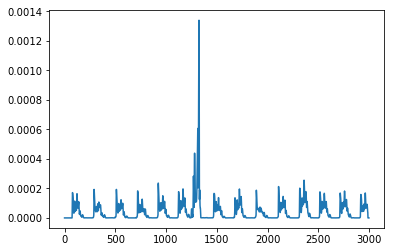

In [21]:
plt.plot(score)